<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-of-mobility" data-toc-modified-id="Exploratory-Data-Analysis-of-mobility-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis of mobility</a></span><ul class="toc-item"><li><span><a href="#Get--data" data-toc-modified-id="Get--data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get  data</a></span></li><li><span><a href="#Exploration-Data-Analitycs" data-toc-modified-id="Exploration-Data-Analitycs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploration Data Analitycs</a></span><ul class="toc-item"><li><span><a href="#Box-and-Density-diagrams" data-toc-modified-id="Box-and-Density-diagrams-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Box and Density diagrams</a></span></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Save-mobility-data" data-toc-modified-id="Save-mobility-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Save mobility data</a></span></li><li><span><a href="#Eda-visualization" data-toc-modified-id="Eda-visualization-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Eda visualization</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis of mobility 

**Libraries and constants.**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(50,30), 'figure.dpi':100, 'font.size' : 10}) # tamño de los plots

print("Pandas", pd.__version__)
print("Numpy", np.__version__)
print("Seaborn",sns.__version__)

Pandas 1.3.5
Numpy 1.21.2
Seaborn 0.11.2


In [2]:
from IPython.core.pylabtools import figsize

In [3]:
%matplotlib inline

In [4]:
box_kws = {"meanline": True, "showmeans": True, "notch": True, "orient": "h", "color": '#aabbbb'}
kde_kws = {"alpha": 0.5, "color": '#1122ff'}
hist_kws = {"alpha": 0.5, 'bins': 100, "color": '#1122ff'}
scatter_kwargs = { 'linewidth': 3, 'linestyle': '-'}#'edgecolor': "w",

## Get  data

In [5]:
####   Wherever you saved it before
m1 = pd.read_csv('~/Trabajo_tfm/datos_csv/datos_mitma.csv') 
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7077 non-null   int64  
 1   fecha              7077 non-null   object 
 2   provincia          7077 non-null   object 
 3   v_muy_cortos       7077 non-null   float64
 4   v_cortos           7077 non-null   float64
 5   v_medios           7077 non-null   float64
 6   v_largos           7077 non-null   float64
 7   v_muy_largos       7077 non-null   float64
 8   v_extra_largos     7077 non-null   float64
 9   v_noche            7077 non-null   float64
 10  v_madrugada        7077 non-null   float64
 11  v_mañana           7077 non-null   float64
 12  v_mediodia         7077 non-null   float64
 13  v_sobremesa        7077 non-null   float64
 14  v_tarde            7077 non-null   float64
 15  v_km_muy_cortos    7077 non-null   float64
 16  v_km_cortos        7077 

In [6]:
m1 = m1.drop(columns = ['Unnamed: 0'])

Set date as index :

In [7]:
contenedor = m1['fecha']
m1['fecha'] = pd.to_datetime(contenedor)
m1.set_index('fecha', inplace=True)
# tarjeta.index #check datatype of index
m1.head()

,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_muy_largos,v_extra_largos,v_noche,v_madrugada,v_mañana,...,v_km_noche,v_km_madrugada,v_km_mañana,v_km_mediodia,v_km_sobremesa,v_km_tarde,cero_viajes,un_viaje,dos_viajes,mas_de_dos_viajes
fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-01,ALICANTE,1.425947e+09,1.318852e+09,1.010684e+09,1.037635e+09,120420418.0,71020690.0,465533067.0,359169359.0,965076794.0,...,3.185250e+09,4.352442e+09,1.371418e+10,1.717379e+10,1.805652e+10,5.597685e+09,851314297.0,150474759.0,412014689.0,664243655.0
2020-03-01,ALMERIA,4.341919e+08,4.761268e+08,4.243445e+08,6.949987e+08,68317578.0,59278893.0,183707347.0,153914145.0,388988585.0,...,1.972960e+09,2.532271e+09,7.744530e+09,9.662103e+09,1.236045e+10,3.561935e+09,415455807.0,107652858.0,198521970.0,341563750.0
2020-03-01,BADAJOZ,5.781239e+08,3.788876e+08,4.537586e+08,8.536597e+08,112599779.0,115993766.0,233059993.0,172586335.0,445212573.0,...,2.427717e+09,3.821297e+09,1.045840e+10,1.493965e+10,1.804473e+10,5.202655e+09,812586622.0,135606609.0,288980489.0,403386675.0
2020-03-01,CADIZ,1.146933e+09,8.300140e+08,4.833672e+08,4.572328e+08,122149414.0,96728513.0,320083956.0,222828938.0,496650046.0,...,2.120067e+09,2.894714e+09,8.339399e+09,1.281027e+10,1.523117e+10,4.746237e+09,432012556.0,103931646.0,280562124.0,534378515.0
2020-03-01,CIUDAD_REAL,4.204837e+08,2.000378e+08,2.208167e+08,4.604185e+08,63507330.0,111473216.0,142928786.0,106146590.0,252656773.0,...,1.530861e+09,2.065407e+09,6.476824e+09,1.039649e+10,1.435191e+10,3.030066e+09,480789793.0,92961056.0,183044093.0,216088434.0


## Exploration Data Analitycs

Create four groups to analyze :

In [38]:
# travels
features_distancias = m1[['provincia','v_muy_cortos', 'v_cortos', 'v_medios', 'v_largos',  'v_muy_largos', 'v_extra_largos']]
features_periodos = m1[['provincia','v_noche', 'v_madrugada', 'v_mañana', 'v_mediodia', 'v_sobremesa', 'v_tarde']]
#travellers
features_viajeros_dist = m1[['provincia','v_km_muy_cortos', 'v_km_cortos', 'v_km_medios', 'v_km_largos', 'v_km_muy_largos','v_km_extra_largos']]
features_viajeros_period = m1[['provincia','v_km_noche', 'v_km_madrugada', 'v_km_mañana','v_km_mediodia', 'v_km_sobremesa', 'v_km_tarde']]
# people moving or not
features_personas = m1[['provincia','cero_viajes', 'un_viaje', 'dos_viajes', 'mas_de_dos_viajes']]

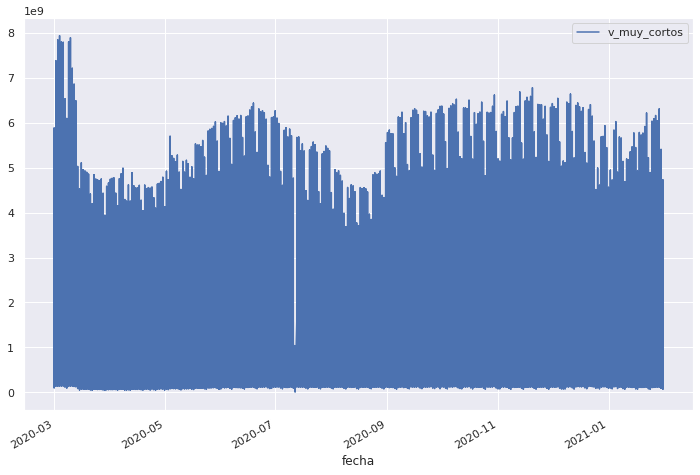

In [40]:
muy_cortos = features_distancias[['provincia','v_muy_cortos']].copy()
muy_cortos.plot(figsize=(12, 8)); plt.show()

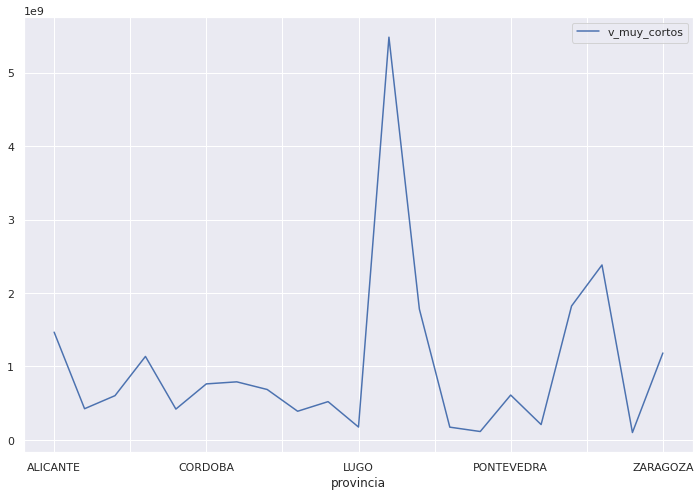

In [43]:
m1_muy_c = muy_cortos[["provincia", 'v_muy_cortos']].groupby(('provincia')).mean()
m1_muy_c.plot(figsize=(12, 8)); plt.show()


In [31]:
features_distancias
distancias_CR = features_distancias[features_distancias.provincia == "CIUDAD_REAL"].copy()
periodos_CR = features_distancias[features_periodos.provincia == "CIUDAD_REAL"].copy()

distancias_CR

,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_muy_largos,v_extra_largos
fecha,,,,,,,
2020-03-01,CIUDAD_REAL,420483719.0,200037822.0,220816713.0,460418516.0,63507330.0,111473216.0
2020-03-02,CIUDAD_REAL,506873462.0,271346890.0,264486054.0,588083866.0,60231321.0,70646252.0
2020-03-03,CIUDAD_REAL,501476798.0,270868235.0,258461002.0,603126502.0,59218087.0,51005206.0
2020-03-04,CIUDAD_REAL,504147186.0,267633417.0,274400226.0,600505947.0,60220217.0,47749347.0
2020-03-05,CIUDAD_REAL,507775120.0,262619793.0,269006759.0,608397178.0,60973485.0,52944712.0
...,...,...,...,...,...,...,...
2021-01-27,CIUDAD_REAL,463872267.0,226003022.0,222579277.0,446335660.0,43418219.0,33425923.0
2021-01-28,CIUDAD_REAL,466560290.0,224391645.0,231294055.0,459274222.0,41882473.0,36780259.0
2021-01-29,CIUDAD_REAL,481892674.0,231069732.0,235454664.0,461418485.0,40981597.0,32373614.0


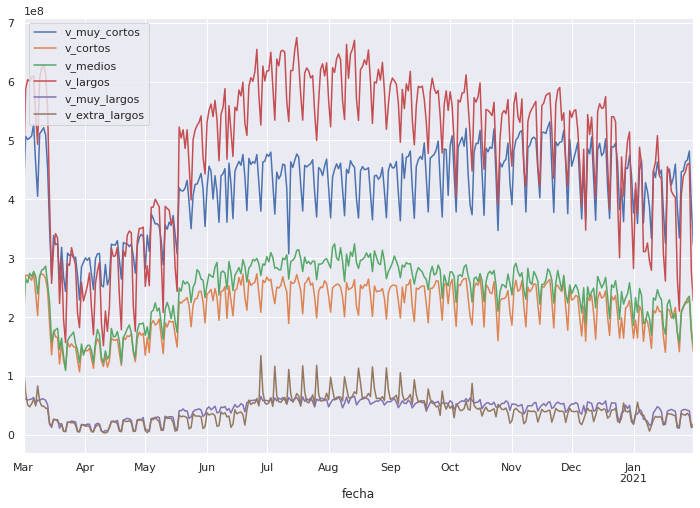

In [29]:
distancias_CR.plot(figsize=(12, 8)); plt.show()

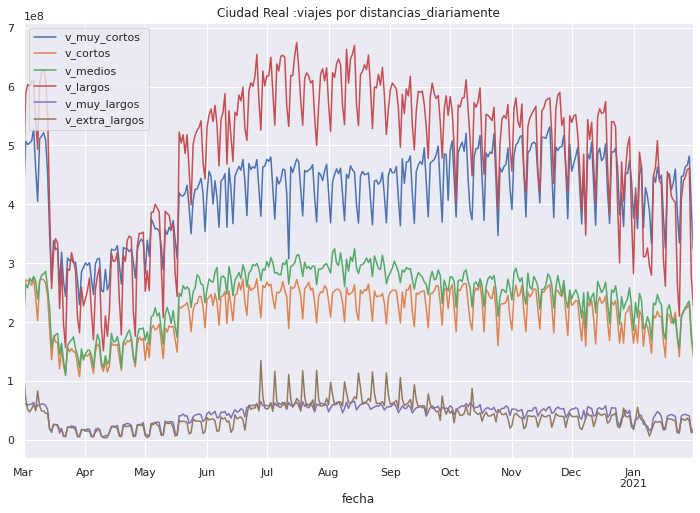

In [36]:
#  
distancias_CR_diariamente = distancias_CR.resample("D").mean()
distancias_CR_diariamente.plot(figsize=(12, 8), style= ['-'])
plt.title("Ciudad Real :viajes por distancias_diariamente"); plt.show()

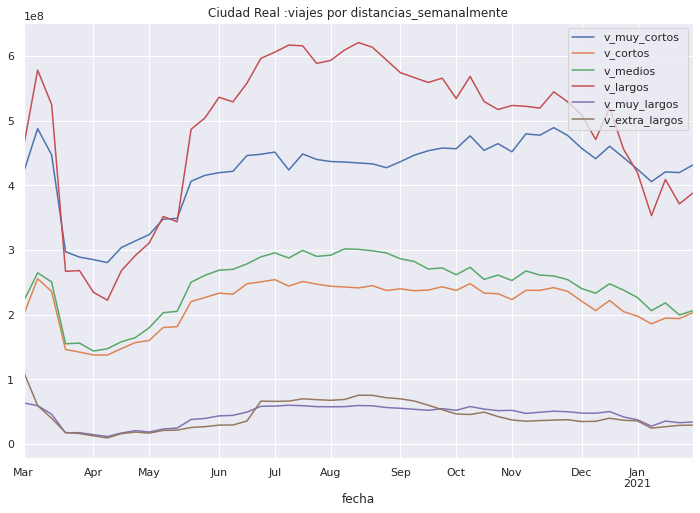

In [33]:
# Weekly 
distancias_CR_diariamente = distancias_CR.resample("W").mean()
distancias_CR_diariamente.plot(figsize=(12, 8), style= ['-'])
plt.title("Ciudad Real :viajes por distancias_semanalmente"); plt.show()

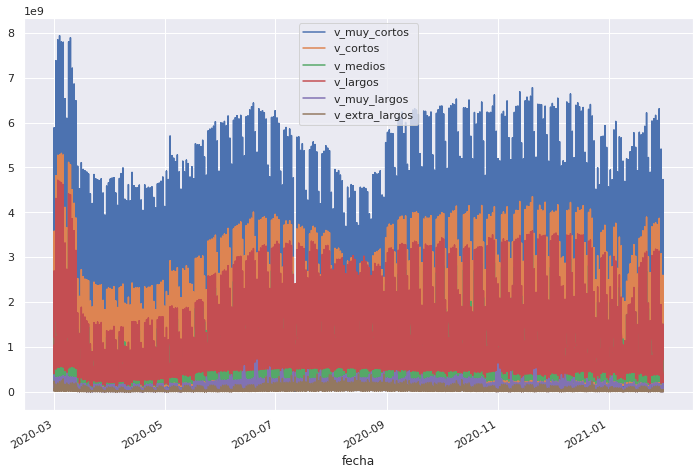

In [9]:
features_distancias.plot(figsize=(12, 8)); plt.show()
plt.title(Todas la provincias :viajes por distancias_semanalmente"); plt.show()

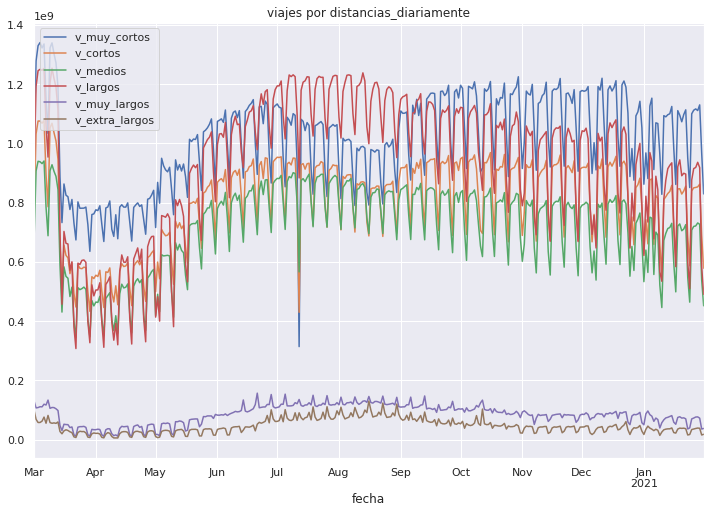

In [10]:
# Weekly 
distancias_diariamente = features_distancias.resample("D").mean()
distancias_diariamente.plot(figsize=(12, 8), style= ['-'])
plt.title("viajes por distancias_diariamente"); plt.show()

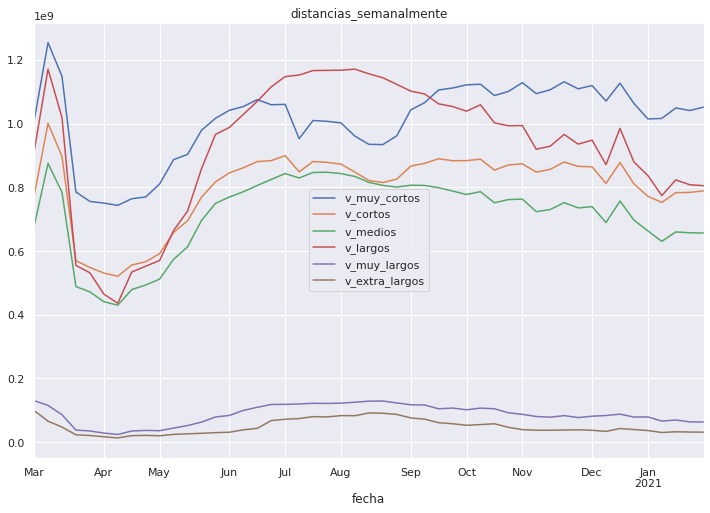

In [11]:
# Weekly 
distancias_semanalmente = features_distancias.resample("W").mean()
distancias_semanalmente.plot(figsize=(12, 8),style= ['-'])
plt.title("distancias_semanalmente"); plt.show()

 Same for all groups of features ......


### Box and Density diagrams

   Activate next two cells to see diagrams

In [12]:
columnas = m1.columns[1:].tolist()
#columnas

num_atributos = m1.columns.size-1 # provincia
print (num_atributos)

28


**Most of the outliers belong to Madrid because of its population.**


**Zaragoza province has a very well defined outliers in m2 group ,people who did cero or more travels.**


----

Zooming into m2 group  :

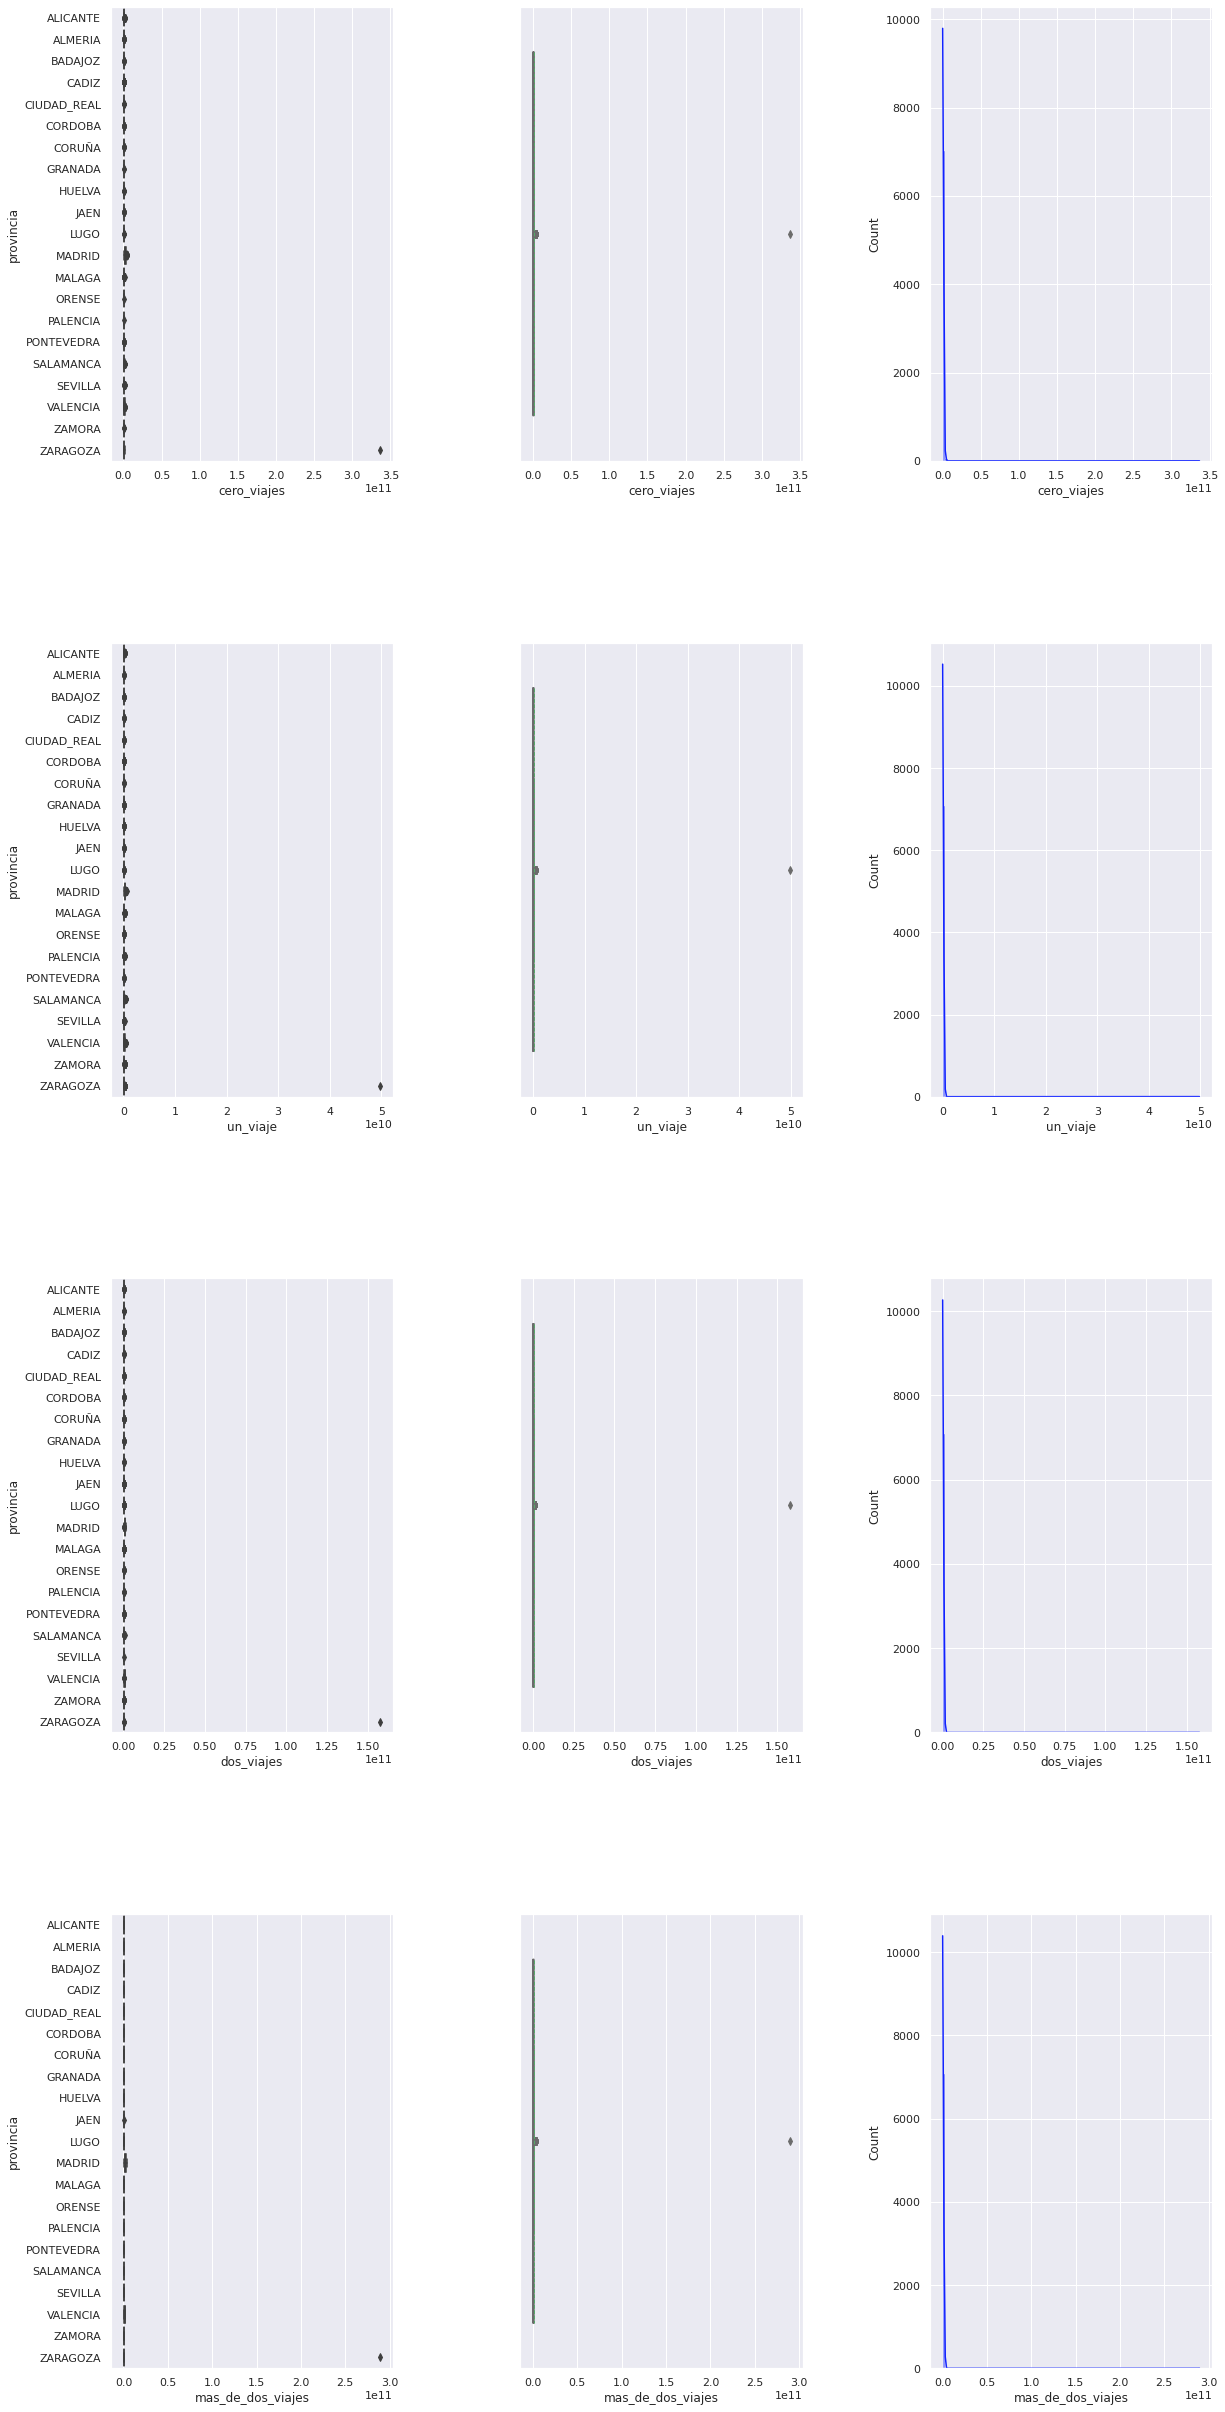

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20)) 
 
#fig.suptitle('M2 people dataset anomalies')

sns.boxplot(ax=axes[0, 0], data=m1, x='cero_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[0, 1], data=m1, x=m1.cero_viajes, **box_kws)
sns.histplot(ax=axes[0, 2],data= m1.cero_viajes, kde=True,  **hist_kws)

sns.boxplot(ax=axes[1, 0], data=m1, x='un_viaje', y="provincia", palette="Set1", orient= "h")
sns.boxplot(ax=axes[1, 1], data=m1, x=m1.un_viaje, **box_kws)
sns.histplot(ax=axes[1, 2],data= m1.un_viaje, kde=True,  **hist_kws)

sns.boxplot(ax=axes[2, 0], data=m1, x='dos_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[2, 1], data=m1, x=m1.dos_viajes, **box_kws)
sns.histplot(ax=axes[2, 2],data= m1.dos_viajes, kde=True,  **hist_kws)

sns.boxplot(ax=axes[3, 0], data=m1, x='mas_de_dos_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[3, 1], data=m1, x=m1.mas_de_dos_viajes, **box_kws)
sns.histplot(ax=axes[3, 2],data= m1.mas_de_dos_viajes, kde=True,  **hist_kws)

plt.subplots_adjust(top=1.92, bottom=0.28, left=0.10, right=0.95, hspace=0.40, wspace=0.45)
plt.show();

In [14]:
m1[[ 'cero_viajes', 'un_viaje', 'dos_viajes', 'mas_de_dos_viajes']].describe()

,cero_viajes,un_viaje,dos_viajes,mas_de_dos_viajes
count,7.077000e+03,7.077000e+03,7.077000e+03,7.077000e+03
mean,7.842360e+08,9.820675e+07,3.364074e+08,5.791763e+08
std,4.030131e+09,5.956137e+08,1.885345e+09,3.465265e+09
min,1.432940e+08,1.537888e+07,5.897811e+07,7.799470e+07
25%,4.070327e+08,4.601039e+07,1.785784e+08,2.667902e+08
50%,6.065824e+08,6.801811e+07,2.441362e+08,4.127282e+08
75%,8.872339e+08,1.056363e+08,3.911355e+08,6.195087e+08
max,3.367947e+11,4.982212e+10,1.577555e+11,2.895853e+11


## Outliers

 Z-score is used to identify ouliers.
 
 Any point whose Z-score score is outside 3rd standard deviation is atypical.



In [15]:
# Identify outliers and store them into a table
def identificacion_outliers (datos) :
    tabla_ = []

    for columna in datos.columns:

        if datos[columna].dtype != 'object' :
            num_outliers = 0

            #print(columna)
            dato = datos[columna]
            data = sorted(dato)
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            #print("Cuartiles: ", q1, q3)
            IQR = q3-q1
            umbral_inferior = q1-(1.5*IQR)
            umbral_superior = q3+(1.5*IQR)
            for i in data:
        
                if (i < umbral_inferior or i > umbral_superior):
                    num_outliers += 1
    
            tabla_.append([columna, num_outliers, num_outliers/len(data)*100,
                           umbral_superior, datos[dato > umbral_superior].provincia.unique(),
                           umbral_inferior, datos[dato < umbral_inferior].provincia.unique()])

    tabla_outliers = pd.DataFrame(tabla_,
                                  columns=['Variable', 'Quantity', 'Percent', 'threshold_sup', 'Provinces_sup',
                                           'threshold_inf', 'Provinces_inf'])
    return tabla_outliers

In [16]:
outliers = identificacion_outliers(m1)
outliers

,Variable,Quantity,Percent,threshold_sup,Provinces_sup,threshold_inf,Provinces_inf
0,v_muy_cortos,405,5.722764,2.781941e+09,"[MADRID, VALENCIA]",-1.182188e+09,[]
1,v_cortos,526,7.432528,2.105804e+09,"[MADRID, VALENCIA]",-8.096301e+08,[]
2,v_medios,466,6.584711,1.666428e+09,"[MADRID, VALENCIA]",-4.012891e+08,[]
3,v_largos,481,6.796665,1.986089e+09,"[MADRID, SALAMANCA, VALENCIA, ZAMORA]",-3.468951e+08,[]
4,v_muy_largos,638,9.015119,2.106207e+08,"[MADRID, VALENCIA, ZARAGOZA, SALAMANCA, ZAMORA]",-6.877689e+07,[]
5,v_extra_largos,545,7.701003,1.245904e+08,"[MADRID, SALAMANCA, ZAMORA, ZARAGOZA, VALENCIA...",-4.912340e+07,[]
6,v_noche,483,6.824926,5.229697e+08,"[MADRID, VALENCIA, SEVILLA, ALICANTE, MALAGA]",-1.309065e+08,[]
7,v_madrugada,556,7.856436,7.564091e+08,"[MADRID, ALICANTE, VALENCIA, ZARAGOZA, SEVILLA]",-1.717608e+08,[]
8,v_mañana,531,7.503179,1.592831e+09,"[MADRID, VALENCIA]",-3.729164e+08,[]
9,v_mediodia,506,7.149922,1.937110e+09,"[MADRID, VALENCIA]",-4.788732e+08,[]


   **Change values for m2 data (people who have done cero, 1,2 or more travels) in the province of Zaragoza.**

   **These values are substituted with median value of the distribution:**

In [17]:
tabla_ = []
# Iteration over columns
for columna in list(m1[['cero_viajes', 'un_viaje','dos_viajes','mas_de_dos_viajes']]):
    for provin in ['ZARAGOZA'] :
        outliers = []
        dato = m1[m1.provincia == provin][columna] 
        data = sorted(dato)
        # cuartiles
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        IQR = q3-q1
    
        umbral_inferior = q1-(1.5*IQR)
        umbral_superior = q3+(1.5*IQR)
        for i in data:
            if (i < umbral_inferior or i > umbral_superior):
                outliers.append(i)

        median = np.median(dato)  ##
        for i in outliers:
            m1.loc[m1.provincia == provin, columna] = np.where(dato == i, median,
                                                            m1.loc[m1.provincia == provin, columna])

**Activate next cell to see the result**

In [18]:
m1[[ 'cero_viajes', 'un_viaje', 'dos_viajes', 'mas_de_dos_viajes']].describe()

,cero_viajes,un_viaje,dos_viajes,mas_de_dos_viajes
count,7.077000e+03,7.077000e+03,7.077000e+03,7.077000e+03
mean,7.367939e+08,9.058685e+07,3.143570e+08,5.383534e+08
std,5.328634e+08,7.192908e+07,2.279325e+08,4.499777e+08
min,1.432940e+08,1.537888e+07,5.897811e+07,7.799470e+07
25%,4.070327e+08,4.601039e+07,1.785784e+08,2.667902e+08
50%,6.065824e+08,6.801811e+07,2.442469e+08,4.127282e+08
75%,8.872339e+08,1.056363e+08,3.916636e+08,6.195087e+08
max,4.555389e+09,6.010997e+08,1.373418e+09,3.666114e+09


In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=m1.index, y="v_muy_largos", data=m1, style="provincia", #**scatter_kwargs,
                     palette="Set1", hue="provincia")

ax.set(xlabel="Fecha", ylabel="v_muy_largos", title="Scatter Plot v_muy_largos")
# save generated scatter plot at program location
plt.savefig("Scatter Plot de v_muy_largos")

##### Activate next cell to see box and scatter diagrams

## Save mobility data

In [ ]:
m1.to_csv("/home/jose/Trabajo_tfm/datos_csv/mobility.csv")

------

## Eda visualization

In [44]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7077 entries, 2020-03-01 to 2021-01-31
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   provincia          7077 non-null   object 
 1   v_muy_cortos       7077 non-null   float64
 2   v_cortos           7077 non-null   float64
 3   v_medios           7077 non-null   float64
 4   v_largos           7077 non-null   float64
 5   v_muy_largos       7077 non-null   float64
 6   v_extra_largos     7077 non-null   float64
 7   v_noche            7077 non-null   float64
 8   v_madrugada        7077 non-null   float64
 9   v_mañana           7077 non-null   float64
 10  v_mediodia         7077 non-null   float64
 11  v_sobremesa        7077 non-null   float64
 12  v_tarde            7077 non-null   float64
 13  v_km_muy_cortos    7077 non-null   float64
 14  v_km_cortos        7077 non-null   float64
 15  v_km_medios        7077 non-null   float64
 16  v_km_l